Python libaries:
- [fhir-py](https://github.com/beda-software/fhir-py)

Talk about using Medical Record Number (in a NHS Trust) and NHS Number for out of area queries.

http://127.0.0.1:32783/fhir/r4/Patient?identifier=c15900bc-1928-4501-804f-9d6aef8ca87e

In [2]:
from fhirpy import SyncFHIRClient
from fhir.resources.observation import Observation
client = SyncFHIRClient(url='http://localhost:32783/fhir/r4', extra_headers={})

# find the patient via identifer - patient id will vary by instance

patients_resources = client.resources('Patient')
pats = patients_resources.search(identifier='https://github.com/synthetichealth/synthea|c15900bc-1928-4501-804f-9d6aef8ca87e')
patientFHIR = pats.first()

patient = patientFHIR.id

print('patient id = ',patient)

patient id =  329409


Show REST query i.e. http://127.0.0.1:32783/fhir/r4/Observation?code=29463-7&patient=20625

In [3]:

obx_resources = client.resources('Observation')

#results = obx_resources.search(patient=patient, category='vital-signs' ).limit(100)

results = {}
#
vital_signs = [ "29463-7", "8302-2", "85354-9", "39156-5", "72514-3"]
for loinc in vital_signs:
    print(loinc)
    results[loinc] = obx_resources.search(patient=patient, code=loinc)
    first_result = results[loinc].first()
    if first_result is not None:
        obxs = Observation.model_validate(first_result.serialize())
        print(obxs.code.coding[0].display)
    results[loinc]
    for i in results[loinc]:
        if hasattr(i, 'valueQuantity') and i.valueQuantity is not None:
            print(f"{round(i.valueQuantity.value, 3)} {i.valueQuantity.unit}", '\t',  i.effectiveDateTime)
        else:
            # Optionally handle other value types
            if hasattr(i, 'valueString'):
                print(f"String value: {i.valueString}", '\t', i.effectiveDateTime)
            elif hasattr(i, 'valueCodeableConcept'):
                print(f"Coded value: {i.valueCodeableConcept.coding[0].display}", '\t', i.effectiveDateTime)
            elif hasattr(i, 'component'):
                for bp in i.component:
                    #print(bp)
                    print(f"{bp.valueQuantity.value} {bp.valueQuantity.unit}", '\t', i.effectiveDateTime)
            else:
                print(f"No value found for observation dated {i.effectiveDateTime}")


29463-7
Body Weight
93.9 kg 	 2015-08-29T00:48:56+00:00
94.2 kg 	 2015-10-17T00:48:56+00:00
95 kg 	 2016-03-12T00:48:56+00:00
95.7 kg 	 2016-07-09T00:48:56+00:00
96 kg 	 2016-09-03T00:48:56+00:00
97.3 kg 	 2017-04-08T00:48:56+00:00
98.2 kg 	 2017-09-09T00:48:56+00:00
98.5 kg 	 2017-11-04T00:48:56+00:00
99.8 kg 	 2018-06-02T00:48:56+00:00
98.7 kg 	 2018-08-04T00:48:56+00:00
97.6 kg 	 2018-09-15T00:48:56+00:00
93.2 kg 	 2019-03-02T00:48:56+00:00
90.5 kg 	 2019-07-27T00:48:56+00:00
90.9 kg 	 2019-09-21T00:48:56+00:00
91.1 kg 	 2019-10-26T00:48:56+00:00
93.3 kg 	 2020-09-26T00:48:56+00:00
95.7 kg 	 2021-10-02T00:48:56+00:00
98.1 kg 	 2022-10-08T00:48:56+00:00
99.8 kg 	 2023-07-08T00:48:56+00:00
97.8 kg 	 2023-10-14T00:48:56+00:00
91.8 kg 	 2024-10-19T00:48:56+00:00
93.1 kg 	 2025-05-24T00:48:56+00:00
8302-2
Body Height
182.3 cm 	 2015-08-29T00:48:56+00:00
182.3 cm 	 2015-10-17T00:48:56+00:00
182.3 cm 	 2016-03-12T00:48:56+00:00
182.3 cm 	 2016-07-09T00:48:56+00:00
182.3 cm 	 2016-09-03T00:

Body Weight


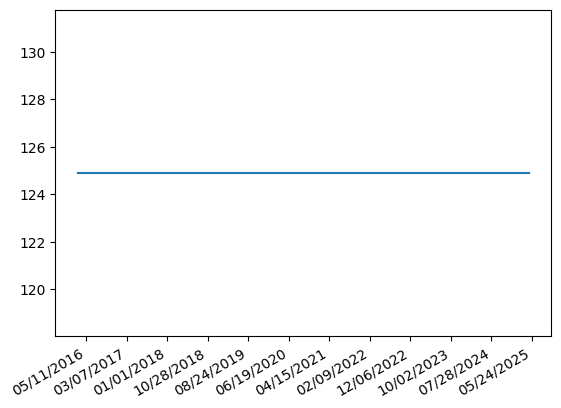

Body Height


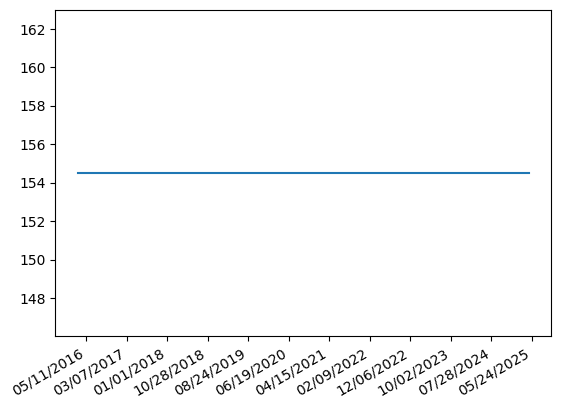

Pain severity - 0-10 verbal numeric rating [Score] - Reported


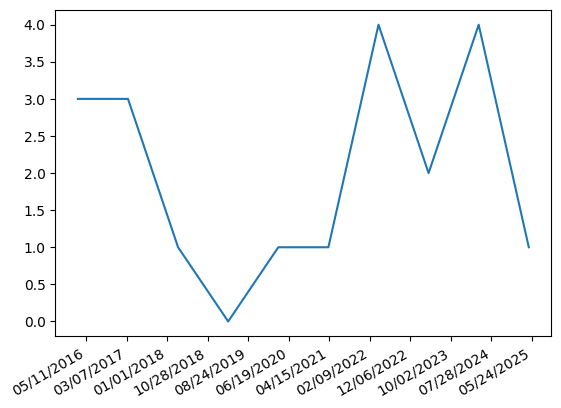

Body Mass Index


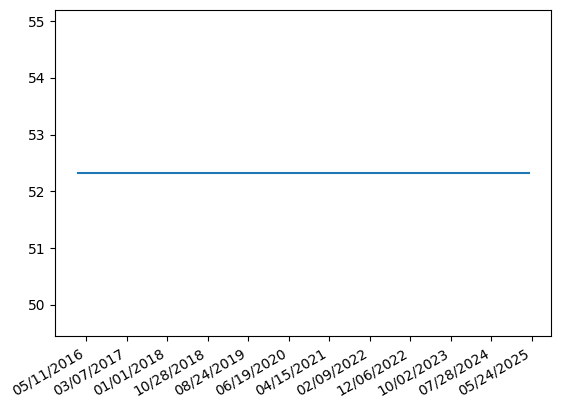

In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

vital_signs = ["29463-7", "8302-2","72514-3","39156-5"]
for loinc in vital_signs:
    try:
        dates = []
        values = []
        for i in results[loinc]:
            dates += [dt.datetime.fromisoformat(i.effectiveDateTime)]
            values += [i.valueQuantity.value]
        xpoints = np.array(dates)
        ypoints = np.array(values)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=300))
        plt.tick_params(axis='x', labelrotation=45)
        plt.plot(xpoints, ypoints)
        plt.gcf().autofmt_xdate()
        first_result = results[loinc].first()
        if first_result is not None:
            obxs = Observation.model_validate(first_result.serialize())

        if hasattr(obxs, 'code') and hasattr(obxs.code, 'coding') and len(obxs.code.coding) > 0:
            print(obxs.code.coding[0].display)
        else:
            print("Required FHIR resource properties not found")


        plt.show()

    except NameError as e:
        print("Error: FHIR Observation resource not properly initialized")
    except Exception as e:
        print(f"An error occurred: {str(e)}")
